In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [24]:
df=pd.read_csv("/Users/igorvm/Downloads/train.csv")
df.fillna("", inplace=True)

In [104]:
def normalize_question(q):
    q = q.lower()
    q = q.replace("?","")
    q = q.replace("..."," . ")
    q = q.replace(".."," . ")
    q = q.replace("."," . ")
    q = q.replace(":"," : ")
    q = q.replace(","," , ")
    q = q.replace("/"," / ")
    q = q.replace("("," ( ")
    q = q.replace(")"," ) ")
    q = q.replace("don't", "do not")
    q = q.replace("i'm", "i am")
    q = q.replace("[math]", " [math] ")
    q = q.replace("[/math]", " [/math] ")
    q = q.replace("-"," - ")
    q = q.replace('"',' " ')
    q = q.replace("'s", " 's ")
    words = q.lower().split()
    words = map(lambda x: x.strip(), words)
    words = filter(lambda x: len(x) > 0, words)
    return " ".join(words)




In [105]:
train_questions = df["question1"].tolist() + df["question2"].tolist()
train_questions = set(questions)
train_questions = map(normalize_question, questions)


In [106]:
def word_frequencies(questions):
    from collections import Counter
    words = " ".join(questions).split(" ")
    counter = Counter(words)
    return sorted(counter.items(), key=lambda x:-x[1])

train_frequencies = word_frequencies(train_questions)



In [107]:
print "number of different words in train questions:", len(train_frequencies)

number of different words in train questions: 97605


In [108]:
most_frequent_train_words=set([w for w,n in train_frequencies[:200]])

print "most frequent train words:", most_frequent_train_words



most frequent train words: set(['all', 'help', 'just', 'being', '-', 'over', 'years', 'using', 'go', 'still', 'find', 'before', 'now', '(', 'had', ',', 'should', 'better', 'to', 'only', 'indian', 'money', 'has', 'app', 'real', 'do', 'them', 'good', 'get', 'quora', 'stop', 'possible', '2', 'were', 'facebook', 'know', 'they', 'not', 'world', 'difference', 'day', 'going', 'school', 'like', 'did', 'university', 'book', 'bad', 'she', 'become', 'where', 'mean', 'google', 'old', 'people', 'some', 'back', 'sex', 'see', 'books', 'college', 'are', 'year', 'girl', 'best', 'out', 'what', 'for', 'ways', 'movie', '/', 'its', '3', 'does', 'between', 'new', 'ever', 'android', 'be', 'we', 'after', 'business', 'learn', 'free', 'job', 'by', 'change', 'on', 'about', 'her', 'language', 'english', 'many', 'could', 'thing', 'women', 'or', 'first', 'love', 'feel', 'into', 'number', 'one', 'been', 'your', 'trump', 'use', '"', 'from', 'would', 'start', 'there', 'two', 'long', '.', 'their', 'live', 'much', 'way'

In [109]:
test_df = pd.read_csv("/Users/igorvm/Downloads/test.csv")
test_df.fillna("", inplace=True)
print test_df.columns

Index([u'test_id', u'question1', u'question2'], dtype='object')


In [110]:
test_questions = map(normalize_question, set(test_df["question1"].tolist() + test_df["question2"].tolist()))
test_frequencies = word_frequencies(test_questions)

In [132]:
all_questions = set(test_questions+train_questions)
all_frequencies = word_frequencies(all_questions)



In [133]:
most_frequent_words = set([w for w, n in all_frequencies[:200]])
print "combined most frequent words:", most_frequent_words

combined most frequent words: set(['all', 'just', 'being', 'money', 'over', 'years', 'questions', 'using', 'go', 'still', 'find', 'before', 'now', '(', 'had', ',', 'should', 'better', 'to', 'only', 'indian', 'has', 'app', 'do', 'them', 'someone', 'get', 'quora', 'stop', 'possible', '2', 'were', 'facebook', 'know', 'they', 'not', 'world', 'difference', 'day', 'going', 'like', 'did', 'university', 'book', 'she', 'become', 'where', 'mean', 'google', 'old', 'weight', 'people', 'some', 'back', 'up', 'see', 'books', 'college', 'are', 'year', 'girl', 'best', 'out', 'what', 'for', 'ways', 'movie', '/', 'its', '3', 'does', 'between', 'new', 'ever', 'android', 'be', 'we', 'after', 'exam', 'business', 'of', 'free', 'job', 'by', 'change', 'improve', 'on', 'about', 'her', 'language', 'english', 'many', 'could', 'programming', 'thing', 'women', 'or', 'first', 'love', 'feel', 'into', 'number', 'one', 'been', 'learning', 'during', 'your', 'trump', 'use', '"', 'from', 'would', 'start', 'there', 'long',

0.604679283757


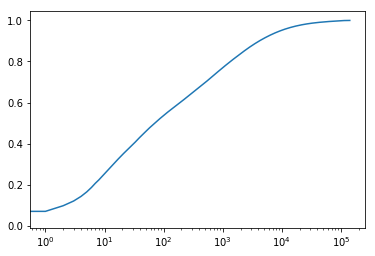

In [135]:
cumulative=[]
c = 0
for w, n in all_frequencies:
    c += n
    cumulative.append(c)
cumulative = np.array(cumulative, dtype=np.float32)/c
plt.plot(range(len(all_frequencies)), cumulative)
plt.xscale('log')
print cumulative[200]


In [112]:
print "number of different test questions:", len(test_questions)
print "number of different words in test questions:", len(test_frequencies)

number of different test questions: 4363832
number of different words in test questions: 103870


In [116]:
train_words = set([w for w, n in train_frequencies])
test_words = set([w for w, n in test_frequencies])

print "test:           ", len(test_words)
print "train:          ", len(train_words)
print "intersect:      ", len(test_words.intersection(train_words))
print "union:          ", len(test_words.union(train_words))
print "test-train:     ", len(test_words-train_words)
print "train-test:     ", len(train_words-test_words)


test:            103870
train:           97605
intersect:       60158
union:           141317
test-train:      43712
train-test:      37447


In [114]:
most_frequent_test_words = set([w for w, n in test_frequencies[:200]])
print "most frequent test words:", most_frequent_test_words

most frequent test words: set(['all', 'just', 'being', 'money', 'over', 'years', 'questions', 'using', 'go', 'still', 'find', 'before', 'now', '(', 'had', ',', 'should', 'better', 'to', 'only', 'indian', 'has', 'app', 'do', 'them', 'someone', 'get', 'quora', 'stop', 'possible', '2', 'were', 'facebook', 'know', 'they', 'not', 'world', 'difference', 'day', 'going', 'like', 'did', 'university', 'book', 'she', 'become', 'where', 'mean', 'google', 'old', 'instagram', 'weight', 'people', 'some', 'back', 'up', 'see', 'books', 'college', 'are', 'year', 'girl', 'best', 'out', 'what', 'for', 'ways', 'movie', '/', 'its', '3', 'does', 'between', 'new', 'ever', 'android', 'be', 'we', 'after', 'exam', 'business', 'of', 'free', 'job', 'by', 'change', 'improve', 'on', 'about', 'her', 'language', 'english', 'many', 'could', 'programming', 'thing', 'women', 'or', 'first', 'love', 'feel', 'into', 'number', 'one', 'been', 'learning', 'your', 'trump', 'use', '"', 'from', 'would', 'start', 'there', 'long', 

In [115]:
print "most frequent train words:", most_frequent_train_words

most frequent train words: set(['all', 'help', 'just', 'being', '-', 'over', 'years', 'using', 'go', 'still', 'find', 'before', 'now', '(', 'had', ',', 'should', 'better', 'to', 'only', 'indian', 'money', 'has', 'app', 'real', 'do', 'them', 'good', 'get', 'quora', 'stop', 'possible', '2', 'were', 'facebook', 'know', 'they', 'not', 'world', 'difference', 'day', 'going', 'school', 'like', 'did', 'university', 'book', 'bad', 'she', 'become', 'where', 'mean', 'google', 'old', 'people', 'some', 'back', 'sex', 'see', 'books', 'college', 'are', 'year', 'girl', 'best', 'out', 'what', 'for', 'ways', 'movie', '/', 'its', '3', 'does', 'between', 'new', 'ever', 'android', 'be', 'we', 'after', 'business', 'learn', 'free', 'job', 'by', 'change', 'on', 'about', 'her', 'language', 'english', 'many', 'could', 'thing', 'women', 'or', 'first', 'love', 'feel', 'into', 'number', 'one', 'been', 'your', 'trump', 'use', '"', 'from', 'would', 'start', 'there', 'two', 'long', '.', 'their', 'live', 'much', 'way'

In [123]:
print "intersect:      ", len(most_frequent_test_words.intersection(most_frequent_train_words))
print "union:          ", len(most_frequent_test_words.union(most_frequent_train_words))
print "most frequent test words, not in most frequent train words:\n", most_frequent_test_words - most_frequent_train_words
print "most frequent train words, not in most frequent test words:\n", most_frequent_train_words - most_frequent_test_words

diff = most_frequent_test_words - most_frequent_train_words
for w in diff:
    n = 0
    for q in test_questions:
        if w in q:  n += 1
    print w, n

intersect:       191
union:           209
most frequent test words, not in most frequent train words:
set(['exam', 'word', 'instagram', 'weight', 'programming', 'learning', 'prepare', 'questions', 'improve'])
most frequent train words, not in most frequent test words:
set(['real', 'school', 'made', 'help', 'two', 'bad', 'examples', 'student', 'happen'])
exam 65593
word 51866
instagram 25242
weight 32315
programming 25407
learning 25397
prepare 27258
questions 30975
improve 40187


In [145]:
nwords = 200
encoding = {}
for i, w in enumerate(most_frequent_words):
    row = np.zeros((nwords,), dtype=np.int8)
    row[i] = 1
    encoding[w] = row
    print w, row


all [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
just [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
being [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 

In [150]:
def encode_question(words, nf_bits, frequent_encoding, nextra_bits, extra_encoding):
    nbits = nf_bits + nextra_bits + 1
    encoded = np.zeros((len(words), nbits), dtype=np.uint8)
    for i, w in enumerate(words):
        if w in frequent_encoding:
            encoded[i, :nf_bits] = frequent_encoding[w]
        else:
            encoded[i, nf_bits:nf_bits+nextra_bits] = extra_encoding[w]
            encoded[i, -1] = 1
    return encoded

def encode_pair(q1, q2, nf_bits, nextra_bits, frequent_set, frequent_encoding):
    # q1 and q2 are unnormalized questions
    q1 = normalize_question(q1)
    q2 = normalize_question(q2)
    q1_words = q1.split()
    q2_words = q2.split()
    q1_words_set = set(q1_words)
    q2_words_set = set(q2_words)
    infrequent = q1_words_set.union(q2_words_set) - frequent_set
    extra_encoding = {}
    if len(infrequent) <= nextra_bits:
        for i, w in enumerate(infrequent):
            enc = np.zeros((nextra_bits,), dtype=np.uint8)
            enc[i] = 1
            extra_encoding[w] = enc
    else:
        # use binary encoding
        for i, w in enumerate(infrequent):
            n = i
            enc = np.zeros((nextra_bits,), dtype=np.uint8)
            j = 0
            while n > 0:
                if n % 2: enc[j] = 1
                n /= 2
            extra_encoding[w] = enc
    q1_encoded = encode_question(q1_words, nf_bits, frequent_encoding, nextra_bits, extra_encoding)
    q2_encoded = encode_question(q1_words, nf_bits, frequent_encoding, nextra_bits, extra_encoding)
    return q1_encoded, q2_encoded
    

for i, pid, qid1, qid2, q1, q2, dup in df.itertuples():
    encode_pair(q1, q2, 200, 10, most_frequent_words, encoding)
    
    

In [50]:
encoding

{'"': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8),
 "'s": array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0,